In [ ]:
#Electric Motor Speed Prediction Project Plan
#Objective:
#Predict motor speed based on various sensor data from a Permanent Magnet Synchronous Motor (PMSM) deployed on a test bench. 
#The goal is to develop accurate models and deploy them for real-world applications, providing insights into motor behavior.

In [ ]:
#project deliverables:
#Evaluation of multiple models with different algorithms.
#Achieving 90-95% accuracy with minimal error.
#Deployment-ready models that can be easily interpreted by non-technical stakeholders.
#Clear insights and visualizations for business storytelling.

In [ ]:
#Data Set Details
#The dataset contains sensor readings from a PMSM, where each row represents a snapshot of sensor data at a specific point in time, 
#collected at a frequency of 2 Hz (i.e., one reading every 0.5 seconds). It consists of multiple measurement sessions, and each session is identified by a unique profile_id. Here is a breakdown of the features available:
#ambient: Ambient temperature near the motor’s stator.
#coolant: Temperature of the coolant used to cool the motor.
#u_d: Voltage component in the d-axis (direct axis).
#u_q: Voltage component in the q-axis (quadrature axis).
#motor_speed: The actual motor speed (target variable).
#torque: The induced torque based on the currents.
#i_d: Current in the d-axis.
#i_q: Current in the q-axis.
#pm: Permanent magnet surface temperature (rotor temperature).
#stator_yoke: Stator yoke temperature.
#stator_tooth: Stator tooth temperature.
#stator_winding: Stator winding temperature.
#profile_id: Identifies the unique measurement session.

In [ ]:
Data Analysis Approach (EDA)
Understanding the Data:

Load and inspect the dataset for missing values, outliers, and data distribution.
Check for correlations between the predictor features (voltage, current, temperature) and the target variable (motor_speed).
Explore trends, patterns, and seasonality over time, particularly for each session identified by profile_id.
Feature Engineering:

Calculate derived features such as average or rolling statistics (e.g., moving averages or cumulative sums) to capture temporal dynamics.
Normalize or scale the features for machine learning model compatibility.
Data Preprocessing:

Handle missing values through imputation or removal, depending on the data distribution.
Split the dataset into training and test sets while ensuring that no leakage occurs across profile_id boundaries (i.e., each session must remain independent).
Use time-based splits or cross-validation to evaluate model performance.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\HI448116_Santosh_Karpe\FY25\DOCS\III\Ass\ASA - SK\Dataset and Objective-20250118T164825Z-001\Dataset and Objective\temperature_data (1).csv')

# Display the first few rows to understand its structure
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [ ]:
#Get an Overview of the Dataset
#Check for basic information about the dataset, such as the number of rows, columns, column names, and data types.

In [2]:
# Check the dataset info to understand types of variables and missing values
df.info()

# Check for missing values
df.isnull().sum()

# Get summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [ ]:
#Check for Missing Data or Duplicates
#It is important to handle missing data or duplicates before proceeding further.

In [3]:
# Check for duplicate rows
df.duplicated().sum()

# Handle missing values (e.g., dropping rows or filling with mean/median)
df = df.dropna()  # Or use df.fillna() depending on the strategy

In [ ]:
#Visualize the Distribution of the Data
#You can use histograms, boxplots, or other visualizations to understand the distribution of the temperature data.

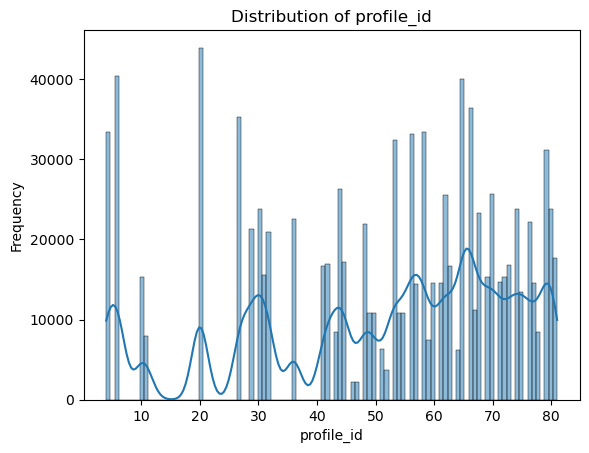

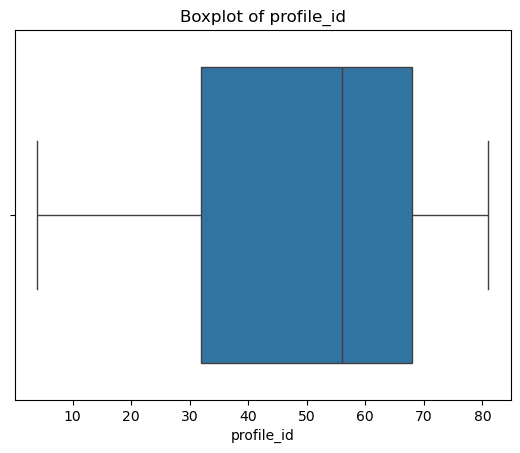

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for profile_id
sns.histplot(df['profile_id'], kde=True)
plt.title('Distribution of profile_id')
plt.xlabel('profile_id')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers
sns.boxplot(x=df['profile_id'])
plt.title('Boxplot of profile_id')
plt.show()